## Load Dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = {}
df[0] = pd.read_csv('Datasets\Aggregation.txt', header=None, sep=" ")
df[1] = pd.read_csv('Datasets\D31.txt', header=None, sep=" ")
df[2] = pd.read_csv('Datasets\R15.txt', header=None, sep=" ")
# df[0].head()
# df[1].head()

for i in range(3):
    print(df[i].head())

       0      1
0  15.55  28.65
1  14.90  27.55
2  14.45  28.35
3  14.15  28.80
4  13.75  28.05
         0       1
0  25.0514  5.7475
1  26.6614  7.3414
2  25.2653  6.2466
3  25.2285  4.7447
4  25.7529  5.1564
        0       1
0   9.802  10.132
1  10.350   9.768
2  10.098   9.988
3   9.730   9.910
4   9.754  10.430


## Data process

In [2]:
for i in range(3):
    min_val = df[i].min()
    max_val = df[i].max()

    df[i] = (df[i] - min_val) / (max_val - min_val)

array = {}
for i in range(3):
    array[i] = df[i].to_numpy()

for i in range(3):
    print(array[i].shape)
# print(array[0].shape)    

(788, 2)
(3100, 2)
(600, 2)


## write your model class

In [3]:
# Modifying the overall structure is acceptable but not recommended

class DPC:
	def __init__(self, dc=None):
		self.dc = dc
		self.rho = None
		self.delta = None
		self.cluster_centers = None

	def _calculate_distance(self, X):
		m, n = X.shape
		X_square = np.square(X)
		ones = np.ones((m, n))
		D_square = X_square @ ones.T + ones @ X_square.T - 2 * X @ X.T
		self.D = np.sqrt(np.abs(D_square))

	def _calculate_local_density(self, X):

		m = X.shape[0]
		self.rho = np.zeros(m)
	
		for i in range(m):
			for j in range(m):
				distance = self.D[i][j]
				if distance < self.dc:
					self.rho[i] += 1
			self.rho[i] = self.rho[i] + np.random.rand()/1000		
			

	def _calculate_delta(self, X):
		m = X.shape[0]
		self.delta = np.zeros(m)
		
		for i in range(m):
			if self.rho[i] == self.rho.max():       # highest density
				self.delta[i] = np.max(self.D[i, :])
			else:
				min_distance = np.inf
				for j in range(m):
					if self.rho[j] > self.rho[i]:
						if min_distance > self.D[i][j]:
							min_distance = self.D[i][j]
				self.delta[i] = min_distance


	def fit(self, X):
		self._calculate_distance(X)
		self._calculate_local_density(X)
		self._calculate_delta(X)

		plt.figure()
		plt.title('Decision Graph')
		plt.xlabel('rho')
		plt.ylabel('delta')
		plt.scatter(self.rho, self.delta, marker = 'o', s = 8)
		plt.show()


	def predict(self, X, rho_bound, delta_bound):
		# center
		self.center = []
		self.outliers = []
		m = X.shape[0]
		for i in range(m):
			if self.rho[i] >= rho_bound and self.delta[i] >= delta_bound:
				self.center.append(i)
			elif self.rho[i] < rho_bound and self.delta[i] >= delta_bound: 	
				self.outliers.append(i)

		self.labels = np.zeros(m)
		for i in range(len(self.center)):
			self.labels[self.center[i]] = i + 1
		
		rho_index = np.argsort(-self.rho)
		# rho_sorted = self.rho[rho_index]

		for i in range(m):
			if (not rho_index[i] in self.outliers) and self.labels[rho_index[i]] == 0:
				cluster_index = rho_index[np.argmin(self.D[rho_index[i]][rho_index[:i]])]
				self.labels[rho_index[i]] = self.labels[cluster_index]
				
		plt.figure()
		plt.title('DPC')
		plt.xlabel('x')
		plt.ylabel('y')
		plt.scatter(X[:, 0], X[:, 1], c = self.labels, cmap = "jet")
		plt.scatter(X[self.center][:, 0], X[self.center][:, 1], c = 'black', marker = 'x')
		plt.show()

		return self.labels
		
	


## Train

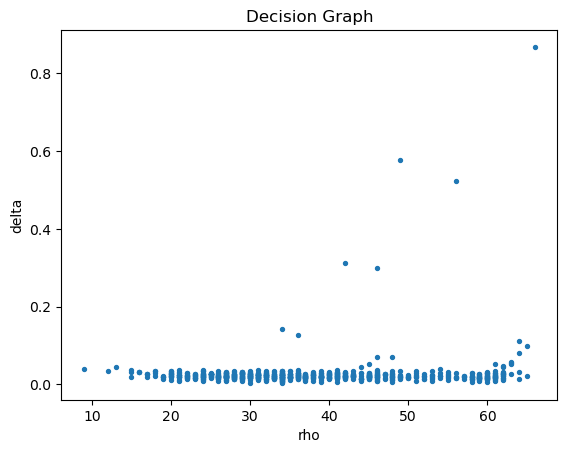

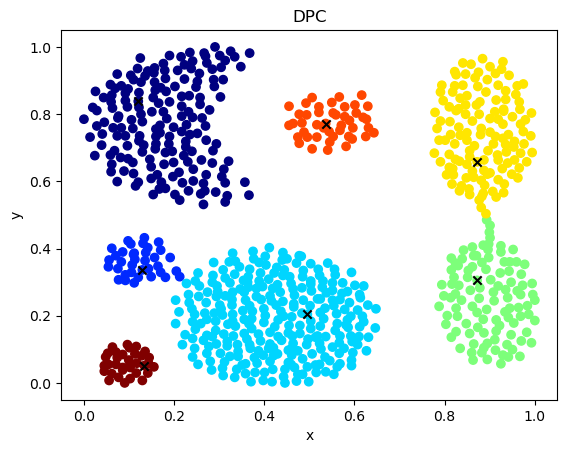

DBI:0.5461285787085287


In [4]:
from sklearn.metrics import davies_bouldin_score
model0 = DPC(0.1)
model0.fit(array[0])
model0.predict(array[0], 30, 0.115)
print('DBI:{}'.format(davies_bouldin_score(array[0], model0.labels)))

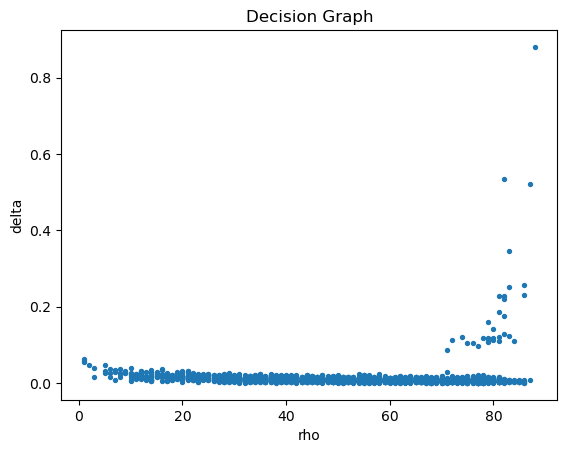

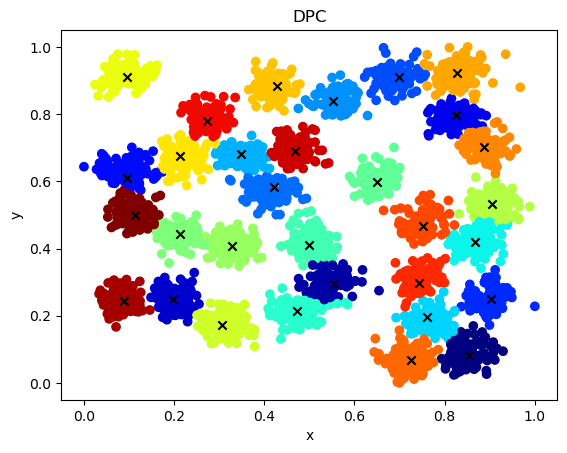

DBI:0.5523239963921653


In [5]:
from sklearn.metrics import davies_bouldin_score
model1 = DPC(0.05)
model1.fit(array[1])
model1.predict(array[1], 60, 0.08)
print('DBI:{}'.format(davies_bouldin_score(array[1], model1.labels)))

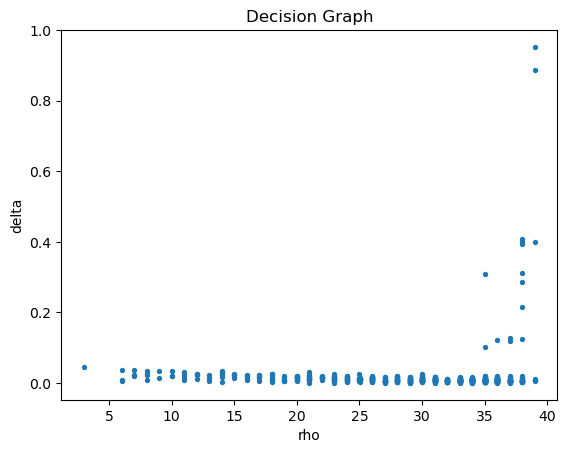

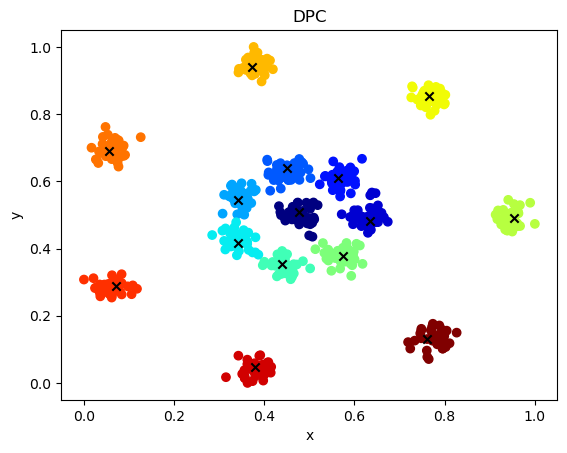

DBI:0.31471445116423397


In [6]:
from sklearn.metrics import davies_bouldin_score
model2 = DPC(0.05)
model2.fit(array[2])
model2.predict(array[2], 30, 0.08)
print('DBI:{}'.format(davies_bouldin_score(array[2], model2.labels)))

In [7]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=7)
predict = model.fit_predict(array[0])
print('DBI:{}'.format(davies_bouldin_score(array[0], predict)))
model = KMeans(n_clusters=31)
predict = model.fit_predict(array[1])
print('DBI:{}'.format(davies_bouldin_score(array[1], predict)))
model = KMeans(n_clusters=15)
predict = model.fit_predict(array[2])
print('DBI:{}'.format(davies_bouldin_score(array[2], predict)))

DBI:0.7050277591438034
DBI:0.6100641619186726
DBI:0.31471445116423397
